*Credits: materials from this notebook belong to YSDA [Practical DL](https://github.com/yandexdataschool/Practical_DL) course. Special thanks for making them available online.*

# Lab assignment №1, part 1

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

## 1. Matrix differentiation

Since it easy to google every task please please please try to undestand what's going on. The "just answer" thing will be not counted, make sure to present derivation of your solution. It is absolutely OK if you found an answer on web then just exercise in $\LaTeX$ copying it into here.

Useful links:
- [Matrix Differentiation (EN)](http://www.atmos.washington.edu/~dennis/MatrixCalculus.pdf)
- [Матричные вычисления (RU)](http://www.machinelearning.ru/wiki/images/2/2a/Matrix-Gauss.pdf)

## Exercise 1

$$  
y = x^Tx,  \quad x \in \mathbb{R}^N
$$

$$
\frac{dy}{dx} =
$$

$$
\textbf{solution:} \\
\frac{d y}{d x} = \frac{d x^T x}{d x} = \frac{d x^T E x}{d x} = Ex + (x^T E)^T = 2x
$$

## Exercise 2

$$ y = tr(AB) \quad A,B \in \mathbb{R}^{N \times N} $$

$$
\frac{dy}{dA} =
$$

$$
\textbf{solution(signs $\sum$ omitted):} \\
\left(\frac{d y}{d A}\right)_{ij} = \frac{d \ tr{(AB)}}{d a_{ij}} = \frac{d (a_{kl} b_{lk}) }{d a_{ij}} = \delta_{ik} \delta_{jl} b_{lk} = b_{ji} \quad \Rightarrow \quad \frac{d y}{d A} = B^T \\
\text{ну или использовать табличную формулу, приведенную в методичке выше} \\
$$
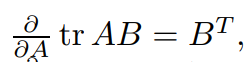

## Exercise 3

$$  
y = x^TAc , \quad A\in \mathbb{R}^{N \times N}, x\in \mathbb{R}^{N}, c\in \mathbb{R}^{N}
$$

$$
\frac{dy}{dx} =
$$

$$
\frac{dy}{dA} =
$$

Hint for the latter (one of the ways): use *ex. 2* result and the fact
$$
tr(ABC) = tr (CAB)
$$

$$
\textbf{solution:} \\
\left(\frac{d y}{d x}\right)_i = \frac{d (x_j a_{jk} c_k)}{d x_i} = a_{ik}c_k \quad \Rightarrow \quad \frac{d y}{d x} = Ac \\
\left(\frac{d y}{d A}\right)_{ij} = \frac{d (x_p a_{pq} c_q)}{d a_{ij}} = x_i c_j \quad \Rightarrow \quad \frac{d y}{d A} = x c^T \\
\text{or using hint:} \quad \ \frac{d y}{d A} = \frac{d x^T A c}{d A} = \frac{d \ tr(x^T A c)}{d A} = \frac{d \ tr(c x^T A)}{d A} = (c x^T)^T = x c^T
$$

## Exercise 4

Classic matrix factorization example. Given matrix $X$ you need to find $A$, $S$ to approximate $X$. This can be done by simple gradient descent iteratively alternating $A$ and $S$ updates.
$$
J = || X - AS ||_F^2  , \quad A\in \mathbb{R}^{N \times R} , \quad S\in \mathbb{R}^{R \times M}
$$
$$
\frac{dJ}{dS} = ?
$$

You may use one of the following approaches:

#### First approach
Using ex.2 and the fact:
$$
|| X ||_F^2 = tr(XX^T)
$$
it is easy to derive gradients (you can find it in one of the refs).

$$
\textbf{solution:} \\
\frac{d J}{d S} = \frac{d \ tr((X-AS)(X-AS)^T)}{d S} = \frac{d}{d S} (tr (X X^T) - tr(X^T A S) - tr(S^T A^T X) + tr(A^T A S S^T)) =  - A^T X - ((A^T X)^T)^T + ((A^T A S)^T)^T + (S^T A^T A)^T = - 2(A^T X - A^T A S) = -2A^T(X - A S)
$$

#### Second approach
You can use *slightly different techniques* if they suits you. Take a look at this derivation:
<img src="grad.png">

(excerpt from [Handbook of blind source separation, Jutten, page 517](https://books.google.ru/books?id=PTbj03bYH6kC&printsec=frontcover&dq=Handbook+of+Blind+Source+Separation&hl=en&sa=X&ved=0ahUKEwi-q_apiJDLAhULvXIKHVXJDWcQ6AEIHDAA#v=onepage&q=Handbook%20of%20Blind%20Source%20Separation&f=false), open for better picture).

$$
\textbf{solution:} \\
\left(\frac{d J}{d S}\right)_{ij} = \frac{d}{d s_{ij}} \left(\sum_{pt}(x_{pt} - (AS)_{pt})^2\right) = \frac{d \left(\sum_{pt}(x_{pt} - \sum_q a_{pq} s_{qt} )^2\right)}{d s_{ij}} = \sum_{pt} \left(2(x_{pt} - \sum_q a_{pq}s_{qt}) \cdot (-\sum_q a_{pq} \delta_{iq}\delta_{jt})\right) = \sum_{pt} \left(2(x_{pt} - \sum_q a_{pq}s_{qt}) \cdot (-a_{pi}\delta_{jt})\right) = -2\sum_p(a_{pi}(x_{pj} - \sum_{q} a_{pq} s_{qj})) = -2 \sum_p (A^T)_{ip} x_{pj} -2 \sum_{pq}((A^T)_{ip} a_{pq} s_{qj}) \equiv \left( -2 A^T(X - AS) \right)_{ij}
$$

#### Third approach
And finally we can use chain rule!
let $ F = AS $

**Find**
$$
\frac{dJ}{dF} =  
$$
and
$$
\frac{dF}{dS} =  
$$
(the shape should be $ NM \times RM )$.

Now it is easy do get desired gradients:
$$
\frac{dJ}{dS} =  
$$

$$
\textbf{solution:} \\
\frac{d J}{d F} = \frac{d \ tr((X-AS)(X-AS)^T)}{d (AS)} = -2((X-AS)^T)^T = -2(X-AS) \\
\frac{d F}{d S} = \frac{d AS}{d S} = A^T \quad \Rightarrow \\
\Rightarrow \quad \frac{d J}{d S} = \frac{d F}{d S}  \frac{d J}{d F} = -2A^T(X-AS)
$$

## 2. kNN questions
Here come the questions from the assignment0_01. Please, refer to the assignment0_01 to get the context of the questions.

### Question 1

Notice the structured patterns in the distance matrix, where some rows or columns are visible brighter. (Note that with the default color scheme black indicates low distances while white indicates high distances.)

- What in the data is the cause behind the distinctly bright rows?
- What causes the columns?

*Your Answer:*

- ***Outliers in the test data are the cause of bright lines that stand out amongst the noise. For example, if they have an all-black pattern, it will be far away to all training data and this will appear as a bright line.***

- ***Similarly, outliers in the training data will cause bright columns.***



### Question 2

We can also use other distance metrics such as L1 distance.
For pixel values $p_{ij}^{(k)}$ at location $(i,j)$ of some image $I_k$,

the mean $\mu$ across all pixels over all images is $$\mu=\frac{1}{nhw}\sum_{k=1}^n\sum_{i=1}^{h}\sum_{j=1}^{w}p_{ij}^{(k)}$$
And the pixel-wise mean $\mu_{ij}$ across all images is
$$\mu_{ij}=\frac{1}{n}\sum_{k=1}^np_{ij}^{(k)}.$$
The general standard deviation $\sigma$ and pixel-wise standard deviation $\sigma_{ij}$ is defined similarly.

Which of the following preprocessing steps will not change the performance of a Nearest Neighbor classifier that uses L1 distance? Select all that apply.
1. Subtracting the mean $\mu$ ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu$.)
2. Subtracting the per pixel mean $\mu_{ij}$  ($\tilde{p}_{ij}^{(k)}=p_{ij}^{(k)}-\mu_{ij}$.)
3. Subtracting the mean $\mu$ and dividing by the standard deviation $\sigma$.
4. Subtracting the pixel-wise mean $\mu_{ij}$ and dividing by the pixel-wise standard deviation $\sigma_{ij}$.
5. Rotating the coordinate axes of the data.

*Your Answer:* 1, 2, 3, 4


*Your Explanation:*

1. $||x^{(k)}_\text{train}-x^{(m)}_\text{test}||_1=\sum_{ij}|(p_{ij}^{(k)})_\text{train}-(p_{ij}^{(m)})_\text{test}|=\sum_{ij}| ((p_{ij}^{(k)})_\text{train} - \mu_{ij}) - ((p_{ij}^{(m)})_\text{test} - \mu_{ij}) | = \sum_{ij} | ((p_{ij}^{(k)})_\text{train} - \mu) - ((p_{ij}^{(m)})_\text{test} - \mu) |$\

2. discussed in the first point

3. Assume $||x^{(k)}_\text{train}-x^{(m)}_\text{test}||_1 < ||x^{(k)}_\text{train}-x^{(k)}_\text{test}||_1$.
After subtracting the means $\mu$ or $\mu_{ij}$ $L_1$ distances won't change. So, it's we need to see what happens when we divide by $\sigma$ or $\sigma_{ij}$.
$||x^{(k)}_\text{train}-x^{(m)}_\text{test}||_1 < ||x^{(k)}_\text{train}-x^{(k)}_\text{test}||_1 \Rightarrow \\
||x^{(k)}_\text{train}-x^{(m)}_\text{test}||_1 / \sigma < ||x^{(k)}_\text{train}-x^{(k)}_\text{test}||_1 / \sigma$
That is, when comparing distances, all results are saved, which is the key point for knn.

4. Dividing by $\sigma_{ij}$ pixel-wise results in feature scaling. For example, if we have two features, and the standard deviation of the first feature is much larger than that of the second, then after dividing by the standard deviation pixel-wise, the first feature will have less weight in calculating the distance. This may lead to changes in the classification results.

5. Rotating by an arbitrary angle can change the L1 distances between data points and, therefore, affect the performance of the classifier. For example, for points (0,1) and (1,0), rotating the axes by $\pi/4$ transforms the distance from 2 to $\sqrt(2)$, i.e., it decreases. At the same time, for points that were initially at coordinates ($\sqrt{2}/2$, $\sqrt{2}/2$) and ($\sqrt{2}/2$, -$\sqrt{2}/2$), the distance increases from $\sqrt{2}/2$ to 2.




## Question 3

Which of the following statements about $k$-Nearest Neighbor ($k$-NN) are true in a classification setting, and for all $k$? Select all that apply.
1. The decision boundary (hyperplane between classes in feature space) of the k-NN classifier is linear.
2. The training error of a 1-NN will always be lower than that of 5-NN.
3. The test error of a 1-NN will always be lower than that of a 5-NN.
4. The time needed to classify a test example with the k-NN classifier grows with the size of the training set.
5. None of the above.

*Your Answer:* 2(но не просто меньше, а меньше либо равно), 4.


*Your Explanation:*
1. The decision boundary of a k-NN classifier is almost always nonlinear. It can be complex. It depends on the distribution of the data.
2. The training error of 1-NN is equal to 0. For 5-NN it can be greater. So $Err_\text{1-NN} \leq Err_\text{5-NN}$.
3. The test error of 1-NN will not always be lower than that of 5-NN. 5-NN can generalize better and have a lower test error.
4. Yes, because it needs to calculate the distances to all points in the training set.


